# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [50]:
# Import libraries
# ----------------

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Numpy
import numpy as np

# json
import json
from pandas.io.json import json_normalize

# Seaborn
import seaborn; seaborn.set()

In [51]:
# Import Data
# ----------------

data = "logins.json"
df = pd.read_json(data)

# Create new column with day of the week
df['count'] = 1

# Set inde|x to login_time
df.set_index('login_time', inplace=True)

# Group logins by time intervals 
df1 = df.groupby(pd.Grouper(freq='15Min')).count()
df1.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


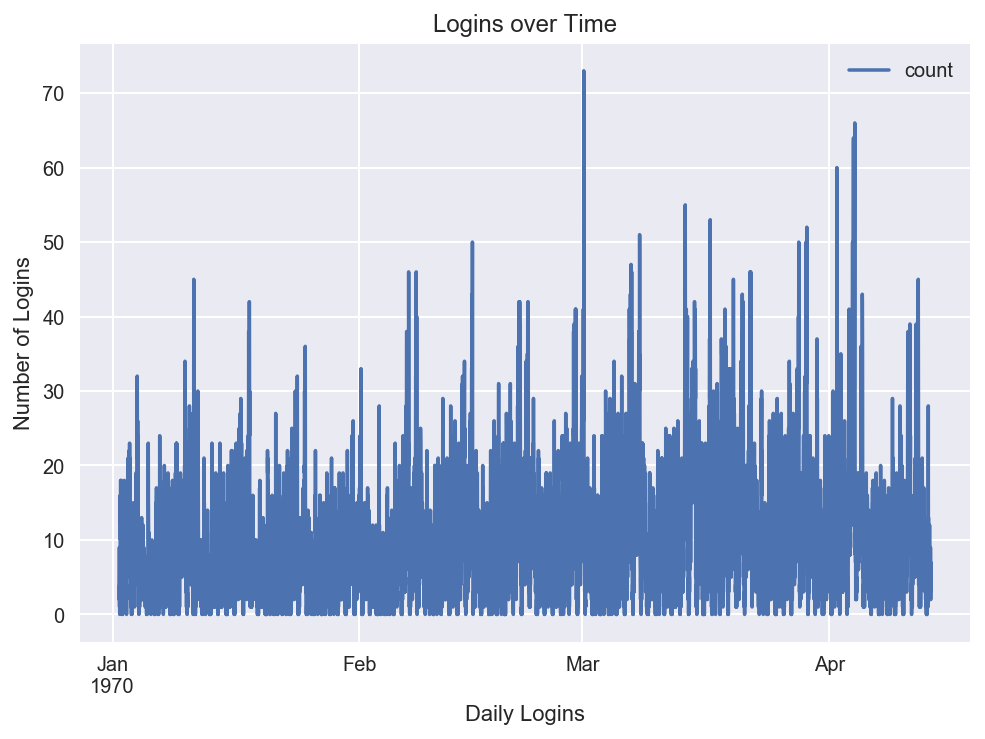

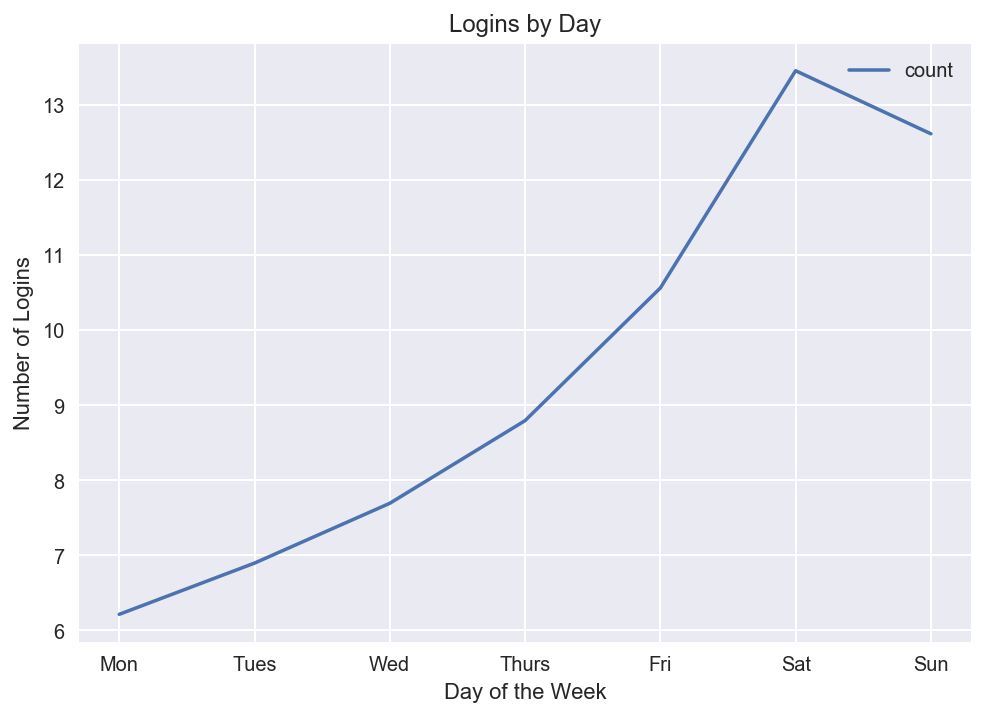

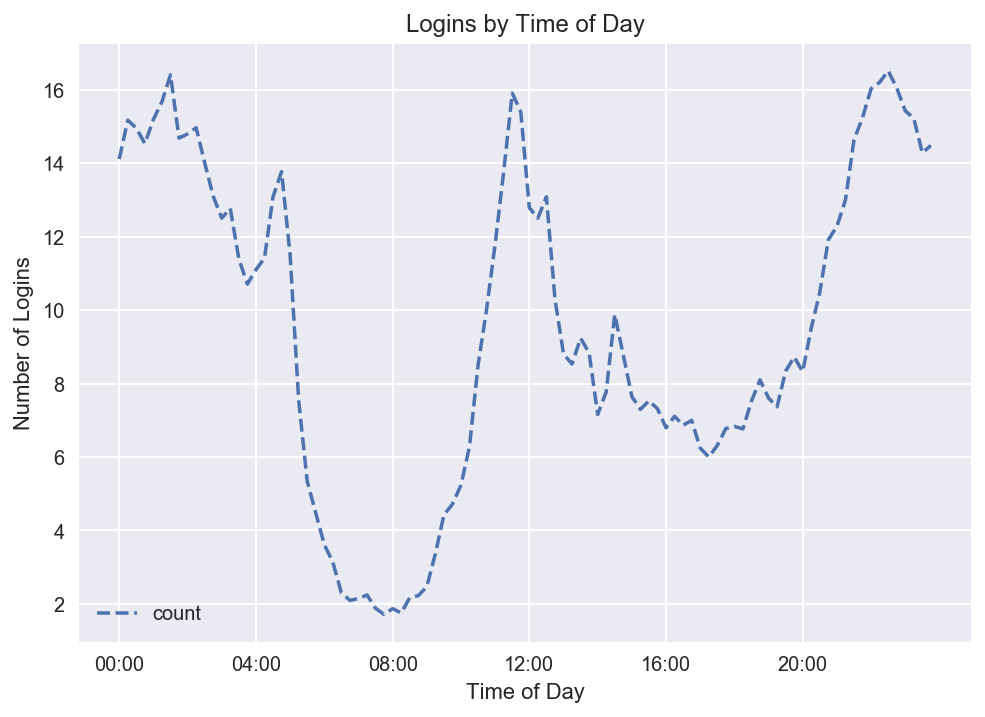

In [87]:
# Plot entire timeseries
df1.plot()
plt.title('Logins over Time')
plt.xlabel('Daily Logins')
plt.ylabel('Number of Logins')
plt.show()

# Plot by day of week
by_weekday = df1.groupby(df1.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
ax = by_weekday.plot()
ax.set_xticklabels([0, 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('Logins by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')

# Plot by time of day 
by_time = df1.groupby(df1.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['--'])
plt.title('Logins by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Logins')

Based on the above plots, the most active day for users is Saturday and the most active time of day is approximately 10 at night. 

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<br>a. how you will implement the experiment
<br>b. what statistical test(s) you will conduct to verify the significance of the
observation
<br>c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#### Answer
The key measure of success for this experiment would be an increase in profitability. The experiment needs to prove to drive partners and city officials that they will make a profit after reimbursing drivers for the toll. 

In order to gather enough information to show the profitability of the experiment, I would perform an A/B test to compare the profits between drivers who continued to remain exclusive to one city to the profits of drivers who participated in the toll reimbursement program. Drivers would be randomly selected so that 50% are in each group. 

I would give the experiment 3 months in order to collect sufficient data in order to perform statistical analysis on the results. If the results of the p-test meet the .05 significance test threshold, then I can reject the null hypothesis and recommend to city officials that they continue to reimburse driver partners. 

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

#### Import and Evaluate Data

To begin I will import the data and check for missing information. 

In [113]:
# Import Data
# ----------------

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [115]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null float64
dtypes: bool(1), float64(7), int64(1), object(4)
memory usage: 4.6+ MB


#### Missing Information
Average rating by driver, average rating of driver, and phone are all missing information. I will replace the missing data as follows:
* **Average Rating by Driver:** Fill with column average
* **Average Rating of Driver:** Fill with column average
* **Phone:** Fill with 'unknown'

In [123]:
# Fill missing values

# Fill missing avg_rating_by_driver with average from dataset
arbd_mean = df['avg_rating_by_driver'].mean()
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(arbd_mean)

# Fill missing avg_rating_of_driver with average from dataset 
arod_mean = df['avg_rating_of_driver'].mean()
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(arod_mean)

# Replace missing phone information with 'unknown'
df['phone'] = df['phone'].fillna('unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null float64
dtypes: bool(1), float64(7), int64(1), object(4)
memory usage: 4.6+ MB


All columns now have complete information!

#### Create Active Column

Next I will create a 'Active' column. Any users that have been retained (ordered a ride in the previous 30 days) will be labeled with 1, any inactive users will be labeled with a 0. 

In [114]:
# Create a column for users who are active (1) or not active (0)
df.loc[df['last_trip_date'] >= '2014-06-01', 'active'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'active'] = 0
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


#### Visualize Data
I want to better understand how many users were retained over the past 6 months and what their activity is like, so I will create a graph for active vs inactive users, active users by city, and active users by phone:

Active Users: 18804.0 (37.6%)


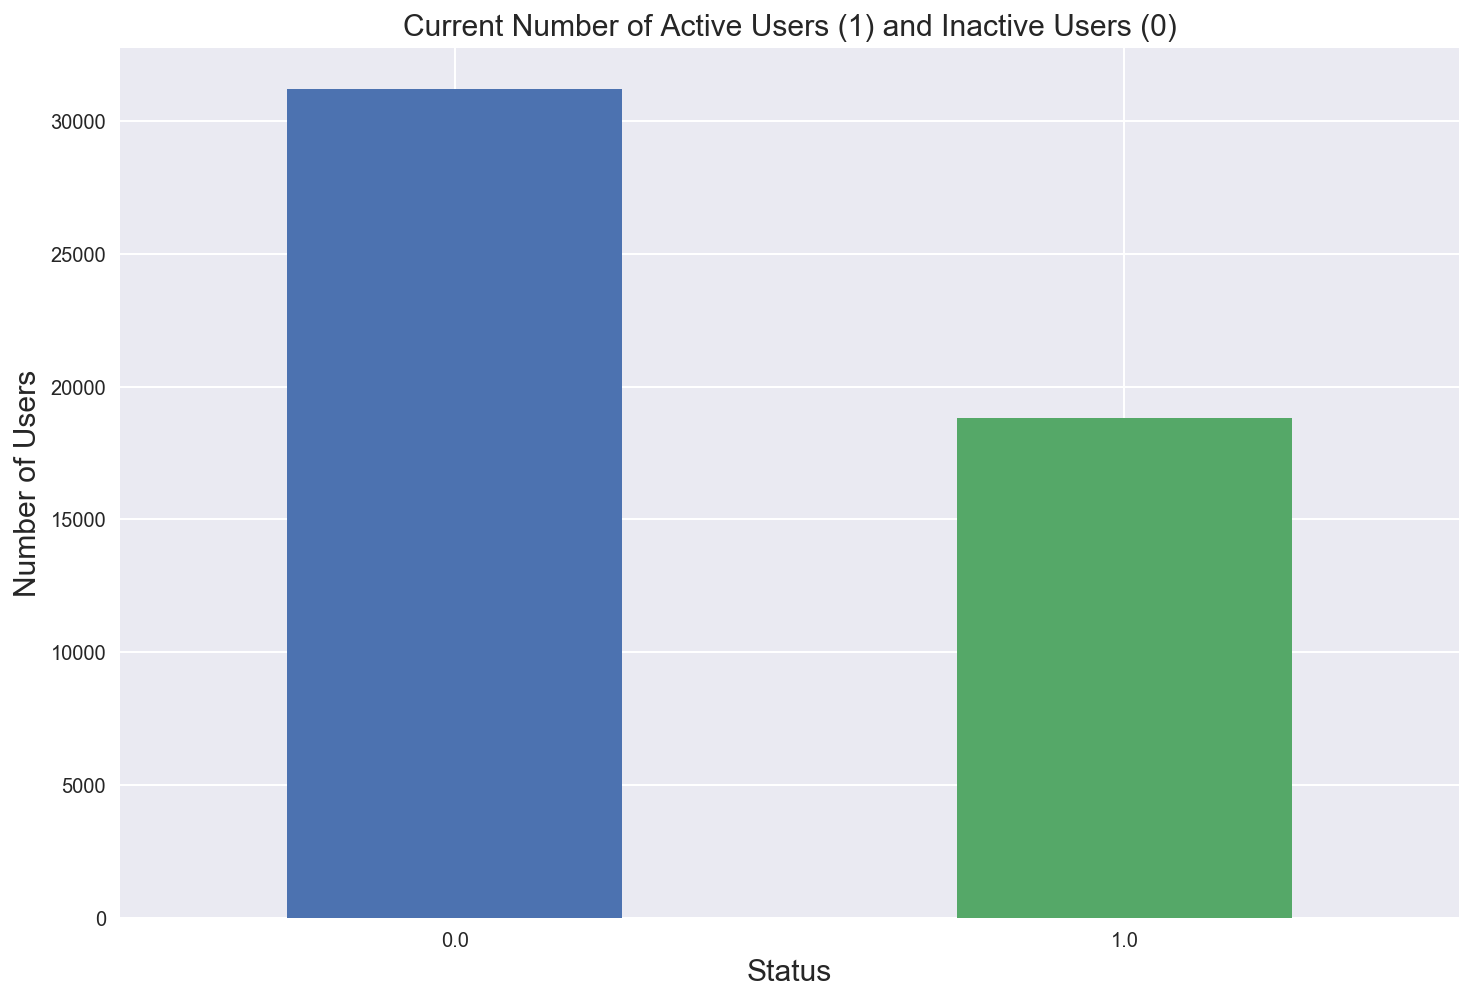

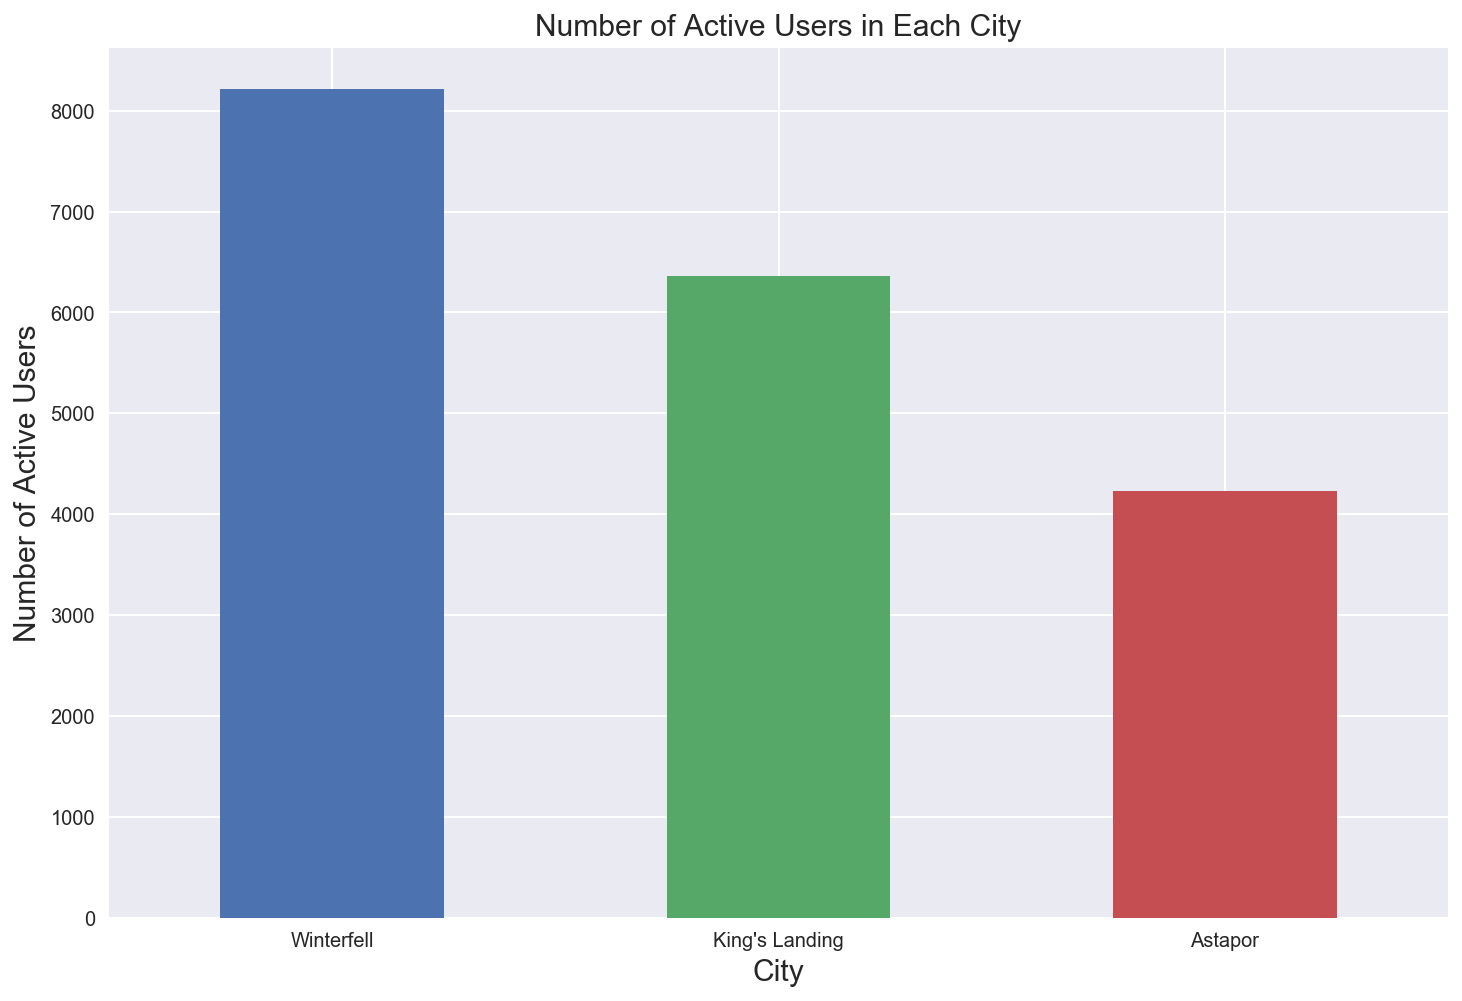

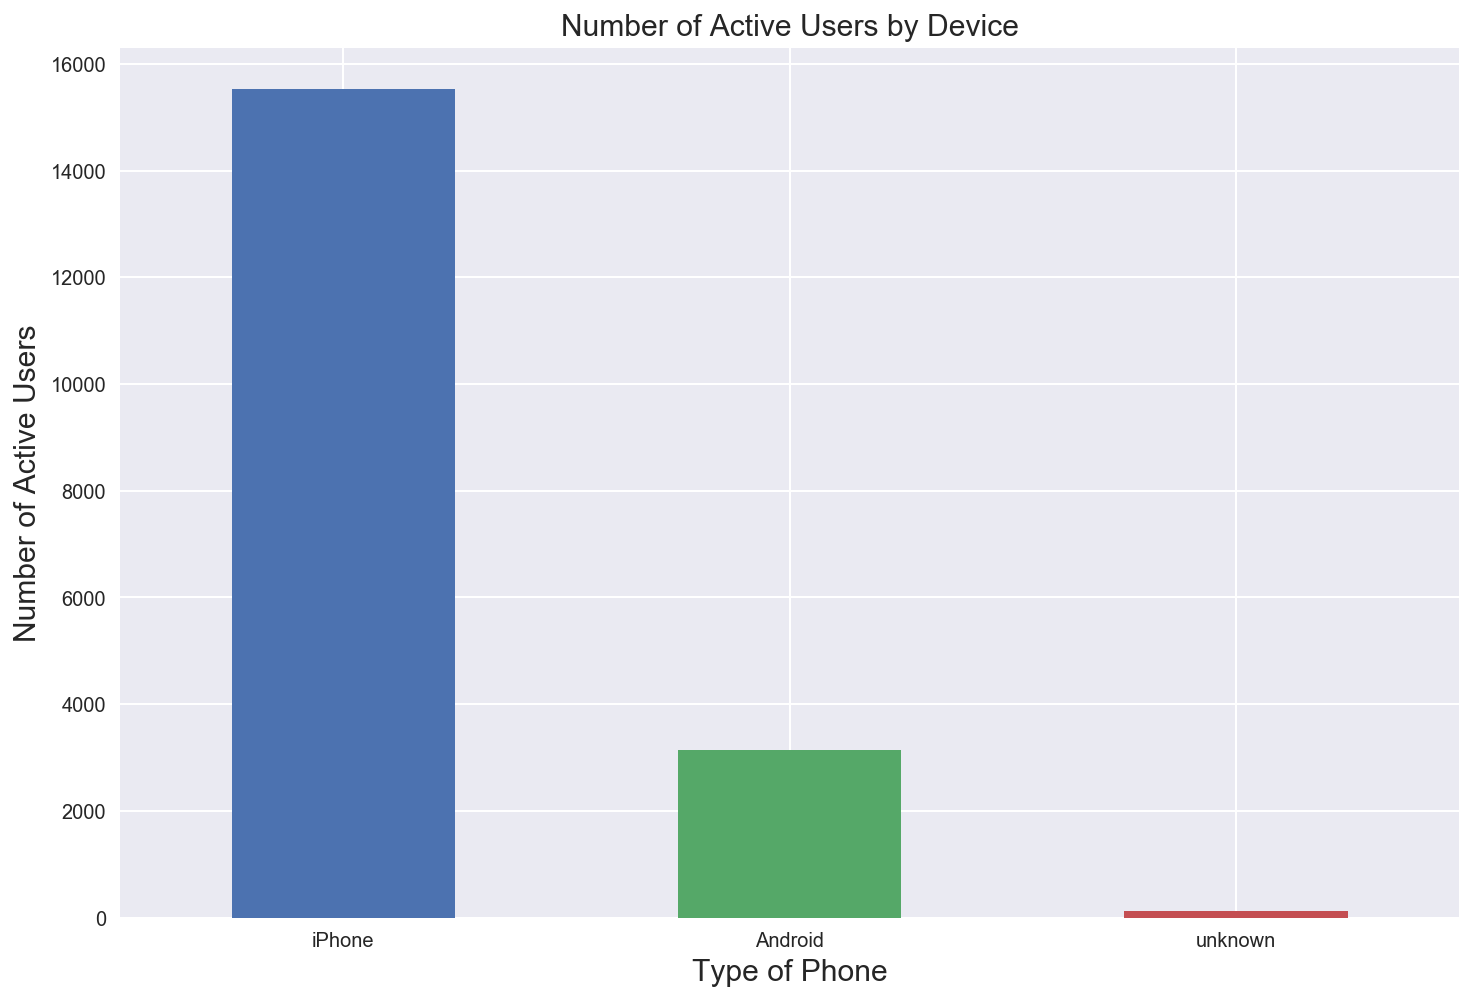

In [238]:
print('Active Users: ', df['active'].sum(),\
      ' (', round(df['active'].mean()*100,1),'%)',sep='')

# Visualize the number of active users
df.active.value_counts().plot(kind = 'bar')
plt.title('Current Number of Active Users (1) and Inactive Users (0)', fontsize=15)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.xticks(rotation='horizontal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Visualize the number of active users by city
df[df.active == 1].city.value_counts().plot(kind = 'bar')
plt.title('Number of Active Users in Each City', fontsize=15)
plt.xlabel('City', fontsize=15, )
plt.ylabel('Number of Active Users', fontsize=15)
plt.xticks(rotation='0')
plt.show()

# Visualize the number of active users by device
df[df.active == 1].phone.value_counts().plot(kind = 'bar')
plt.title('Number of Active Users by Device', fontsize=15)
plt.xlabel('Type of Phone', fontsize=15, )
plt.ylabel('Number of Active Users', fontsize=15)
plt.xticks(rotation='0')
plt.show()

It appears that active users are more likely to be from Winterfell and use an iPhone!

### Predictive Modeling

Next I will build a model to predict which users are likely to be active in six months. I have decided to use a Random Forest model. 

In [191]:
# Import Libraries
# ------------------

# Scikit Learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [216]:
# Drop columns that should be excluded from the model 
drop = [
    'avg_dist',
#    'avg_rating_by_driver',
    'avg_rating_of_driver',
#    'avg_surge',
#    'city',
    'last_trip_date',
#    'phone',
    'signup_date',
#    'surge_pct',
#    'trips_in_first_30_days',
#    'ultimate_black_user',
#    'weekday_pct',
    'active'
]

# Categorical features to be converted to dummy variables
# if listed here, they cannot be in the 'dropped' list, above
dummies = [
    'city',
    'phone',
#    'ultimate_black_user'
]

# Feature column that identifies whether a user has taken a ride in the previous 30 days
labels = ['active']

# Create y variable
y = df['active'].values

In [233]:
print('Users:       ', df.shape[0])
print('Dimensions:  ', df.shape[1])

Users:        50000
Dimensions:   13


In [218]:
# Drop Feature columns that will not be used in the model
df_prep = df.drop(columns=drop)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
avg_rating_by_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 2.7+ MB


In [219]:
# Create dummy variable columns
df_prep = pd.get_dummies(data=df_prep, columns=dummies)
df_prep.describe()

,avg_rating_by_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.778158,1.074764,8.849536,2.278200,60.926084,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920
std,0.445753,0.222336,19.958811,3.792684,37.081503,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
# feature columns remaining for creating a model
feat_labels = [c for c in df_prep]

for c in feat_labels:
    print(c)

avg_rating_by_driver
avg_surge
surge_pct
trips_in_first_30_days
ultimate_black_user
weekday_pct
city_Astapor
city_King's Landing
city_Winterfell
phone_Android
phone_iPhone
phone_unknown


In [221]:
# Create X variable
X = df_prep.values

In [232]:
# split data randomly into training and test sets
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

rf = RandomForestClassifier(max_depth=10, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

errors = abs(y_pred - y_test)

print('Test accuracy: ', 1.0 - round(np.mean(errors), 2), sep='')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, sample_weight=None, digits=4))

# Print the name and importance of each feature, rounded to 2 decimal places
for feature in zip([round(elem, 2) for elem in rf.feature_importances_], feat_labels):
    print(feature)

Test accuracy: 0.78
[[6704 1104]
 [1603 3089]]
             precision    recall  f1-score   support

        0.0     0.8070    0.8586    0.8320      7808
        1.0     0.7367    0.6584    0.6953      4692

avg / total     0.7806    0.7834    0.7807     12500

(0.26, 'avg_rating_by_driver')
(0.08, 'avg_surge')
(0.14, 'surge_pct')
(0.06, 'trips_in_first_30_days')
(0.06, 'ultimate_black_user')
(0.12, 'weekday_pct')
(0.04, 'city_Astapor')
(0.12, "city_King's Landing")
(0.02, 'city_Winterfell')
(0.07, 'phone_Android')
(0.03, 'phone_iPhone')
(0.0, 'phone_unknown')


This model has a 78% accuracy in predicting whether a user will still be active six months after signing up. Average Rating by Driver, Weekday Activity, and City appeared to be the strongest factors in predicting active status. 

#### Conclusions
Due to the large discrepancy between the number of Android and iPhone users, I recommend that Ultimate perform additional exploration into why Android users are not using the app. Does the app not perform as well on Android? Is it the demographic profile of Android users? Whether or not a user had an Android had a 7% weight on the model performance. 

Additionally, I would recommend that Ultimate invest more marketing in King's Landing since this had a lot of weight in predicting whether a user would be active. Seeing as more users come from Winterfell than King's Landing, they should focus on increasing the number of users in King's Landing. 